Given an array grains giving the width and length of samples of grain. Checking whether width and length will be correlated.

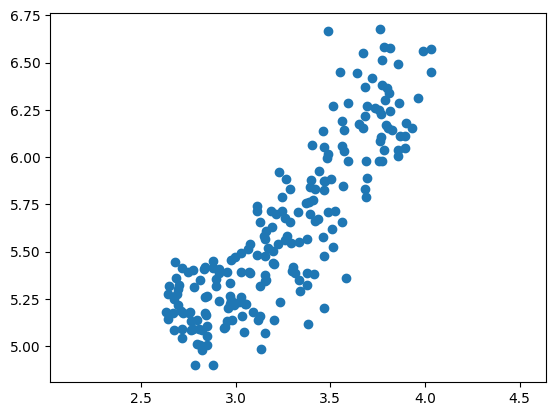

0.8604405325922294


In [25]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

grains = pd.read_csv('/content/seeds-width-vs-length.csv')

# Assign the 0th column of grains: width
width = grains.iloc[:, 0]

# Assign the 1st column of grains: length
length = grains.iloc[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

The width and length of the grain samples are highly correlated. Using PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation

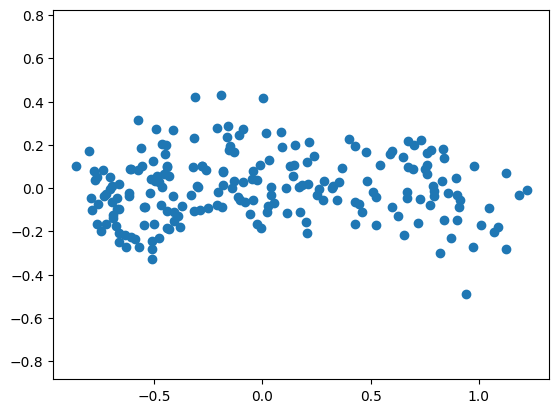

1.2077600204662975e-13


In [26]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

Using PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

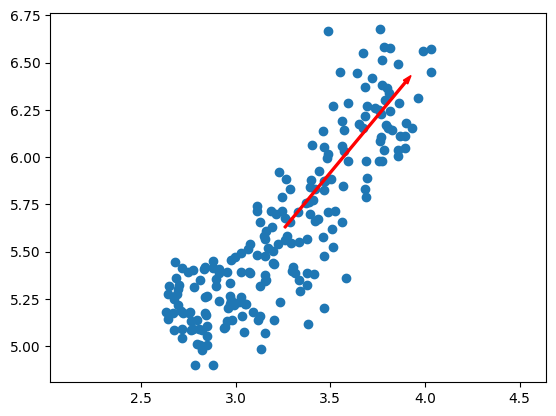

In [27]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

This is the direction in which the grain data varies the most.

The fish dataset is 6-dimensional. We are trying to find out its intrinsic dimension. A plot of the variances of the PCA features is plotted

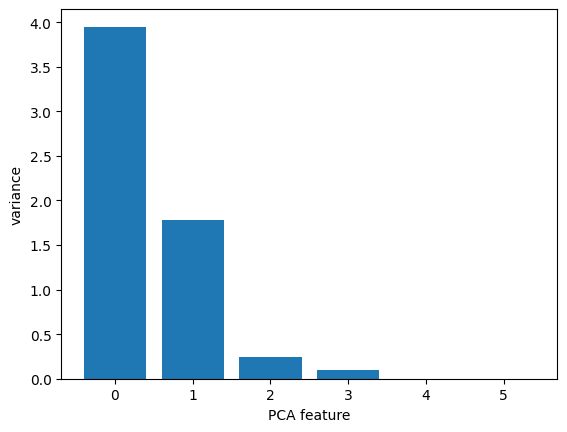

In [30]:
samples = pd.read_csv('fish.csv')
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Remove the first column (fish species) from the DataFrame as it is non-numeric
samples_numeric = samples.iloc[:, 1:]

# Fit the pipeline to the numeric samples
scaled_samples= pipeline.fit_transform(samples_numeric)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

 It looks like PCA features 0 and 1 have significant variance. Hence, 2 is a reasonable choice for the "intrinsic dimension" of the fish measurements. Using PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [31]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

#scaled_samples = pipeline.fit(samples_numeric)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(84, 2)


Create a tf-idf word frequency array for a toy collection of documents.

In [32]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays.Combining TruncatedSVD and k-means to cluster some popular pages from Wikipedia

In [35]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
# ''' The reason for taking this transpose is that without it,
# there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.'''
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [37]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))



    label                                        article
24      0                                   Jessica Biel
25      0                                  Russell Crowe
26      0                                     Mila Kunis
27      0                                 Dakota Fanning
20      0                                 Angelina Jolie
21      0                             Michael Fassbender
29      0                               Jennifer Aniston
28      0                                  Anne Hathaway
22      0                              Denzel Washington
23      0                           Catherine Zeta-Jones
31      1                              Cristiano Ronaldo
30      1                  France national football team
35      1                Colombia national football team
34      1                             Zlatan Ibrahimović
59      1                                    Adam Levine
58      1                                         Sepsis
51      1                      

Noticeably you can see a pattern clustered within the same labels